# 宽基指数和行业分布

## 导入模块

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import feather
import os
from tqdm.notebook import tqdm
import sunlandsdatasdk as sd

## 读入股价跳跃数据和指数成分股

In [93]:
jump = pd.DataFrame(columns=['issue', 'date', 'jump', 'ret_jump'])
base_dir = '../data/jump/2019/'
files = os.listdir(base_dir)
for file in files:
    if not os.path.isdir(file):
        jump_daily = feather.read_dataframe(base_dir + file)
        if jump.empty:
            jump = jump_daily
        else:
            jump = pd.concat([jump, jump_daily])
jump = jump[jump['jump']]

In [96]:
jump['date'] = pd.to_datetime(jump['date'])
date_series = jump['date'].sort_values().unique()
jump['year_mon'] = jump['date'].dt.year * 100 + jump['date'].dt.month

In [88]:
# sd.auth('*', '*')
# hs800 = pd.DataFrame(columns=['issue', 'date'])
# hs1000 = pd.DataFrame(columns=['issue', 'date'])
# for date in tqdm(date_series):
#     hs800_daily = pd.DataFrame(columns=['issue', 'date'])
#     hs800_daily['issue'] = sd.get_index_stocks('000906', weight=False, date=date)
#     hs800_daily['date'] = date
#     if hs800.empty:
#         hs800 = hs800_daily.copy()
#     else:
#         hs800 = pd.concat([hs800, hs800_daily])
#     hs1000_daily = pd.DataFrame(columns=['issue', 'date'])
#     hs1000_daily['issue'] = sd.get_index_stocks('000852', weight=False, date=date)
#     hs1000_daily['date'] = date
#     if hs1000.empty:
#         hs1000 = hs1000_daily
#     else:
#         hs1000 = pd.concat([hs1000, hs1000_daily])
# os.makedirs('../data/indices/', exist_ok=True)
# feather.write_dataframe(hs800, '../data/indices/hs800.feather')
# feather.write_dataframe(hs1000, '../data/indices/hs1000.feather')

In [89]:
hs800 = feather.read_dataframe('../data/indices/hs800.feather')
hs1000 = feather.read_dataframe('../data/indices/hs1000.feather')

## 宽基指数

In [98]:
jump_hs800 = pd.merge(
    jump,
    hs800,
    on=['issue', 'date'],
    how='inner'
)

jump_hs1000 = pd.merge(
    jump,
    hs1000,
    on=['issue', 'date'],
    how='inner'
)

### 跳跃数量统计

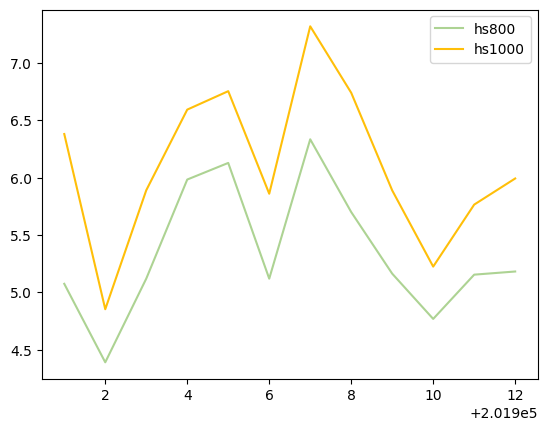

In [120]:
jump_count_800 = jump_hs800.groupby('year_mon')['jump'].count() / 800
jump_count_1000 = jump_hs1000.groupby('year_mon')['jump'].count() / 1000
plt.plot(jump_count_800, color='#add393', label='hs800')
plt.plot(jump_count_1000, color='#ffbf09', label='hs1000')
plt.legend()
plt.show()

### 跳跃幅度统计

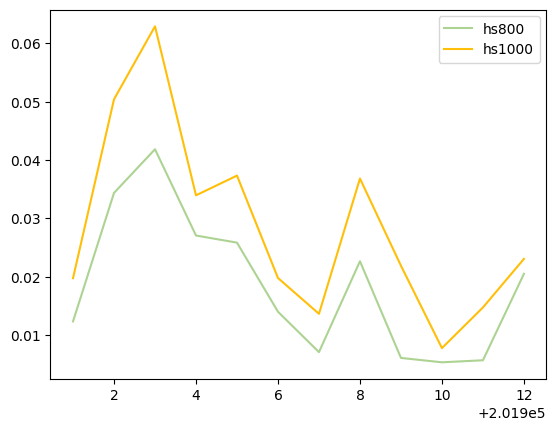

In [127]:
ret_jump_month_800 = jump_hs800.groupby(['issue', 'year_mon'])['ret_jump'].sum().reset_index()
ret_800 = ret_jump_month_800.groupby('year_mon')['ret_jump'].median()
ret_jump_month_1000 = jump_hs1000.groupby(['issue', 'year_mon'])['ret_jump'].sum().reset_index()
ret_1000 = ret_jump_month_1000.groupby('year_mon')['ret_jump'].median()
plt.plot(ret_800, color='#add393', label='hs800')
plt.plot(ret_1000, color='#ffbf09', label='hs1000')
plt.legend()
plt.show()

## 行业分布